# WeatherPy
----

### Analysis
* The data confirms our expectation that temperatures are warmer near the equator. Interestingly, the highest temperature recorded is not at the equator, but in Yulara, AU at latitute -25.24. This may be due to the Earth's axial tilt, which would also explain why some cities that are even further south recorded a maximum temperature equal to or near the maximum at the equator. It also explains why, of the 167 cities with a max recorded temperature below 40 degrees, all were located in the northern hemisphere.

* There is no strong relationship between latitude and humidity. However, there is a strong band of cities with 100% humidity, mostly between latitudes -20 and 20.

* There is no strong relationship between latitude and wind speed. However, the greatest wind speeds were recorded in the northern hemisphere. Only two southern hemisphere cities records winds over 20 mph, while 18 northern cities reached or exceeded that speed.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [121]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import csv
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [84]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [136]:
# Set base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Begin progress printout
print("Beginning Data Retrieval")
print("-----------------------------")

# Initialize city number and set number variables to use in loop
city_number = 1
set_number = 1

# Create empty list to store json responses
responses = []

# Loop through list of cities, calling API for each one
for city in cities:
    
    # Set dynamic url variable for requests
    query_url = f"{base_url}q={city}&units=imperial&appid={api_key}"
    
    # Call api and append response list with each response
    response = requests.get(query_url).json()
    responses.append(response)
    
    # Use try/except to skip a city if no weather data is available
    try:
        print(f"Processing Record {city_number} of Set {set_number} | {city}")
        city_number += 1
        if city_number > 50:
            city_number = 1
            set_number += 1
            
    except (KeyError, IndexError):
        print("No city found. Skipping...")
        
# End progress printout
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | araouane
Processing Record 2 of Set 1 | taolanaro
Processing Record 3 of Set 1 | chibombo
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | san quintin
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | manta
Processing Record 9 of Set 1 | rio grande
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | qianguo
Processing Record 12 of Set 1 | zhigansk
Processing Record 13 of Set 1 | kahului
Processing Record 14 of Set 1 | lorengau
Processing Record 15 of Set 1 | abdanan
Processing Record 16 of Set 1 | cayenne
Processing Record 17 of Set 1 | leticia
Processing Record 18 of Set 1 | saleaula
Processing Record 19 of Set 1 | kegayli
Processing Record 20 of Set 1 | okhotsk
Processing Record 21 of Set 1 | souillac
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 | puerto ayora
Processing 

Processing Record 48 of Set 4 | sangar
Processing Record 49 of Set 4 | wuning
Processing Record 50 of Set 4 | honningsvag
Processing Record 1 of Set 5 | bontang
Processing Record 2 of Set 5 | kalga
Processing Record 3 of Set 5 | xichang
Processing Record 4 of Set 5 | bondo
Processing Record 5 of Set 5 | hambantota
Processing Record 6 of Set 5 | campos altos
Processing Record 7 of Set 5 | chapais
Processing Record 8 of Set 5 | makakilo city
Processing Record 9 of Set 5 | hongjiang
Processing Record 10 of Set 5 | caranavi
Processing Record 11 of Set 5 | afmadu
Processing Record 12 of Set 5 | belushya guba
Processing Record 13 of Set 5 | stranda
Processing Record 14 of Set 5 | bela
Processing Record 15 of Set 5 | davila
Processing Record 16 of Set 5 | tumannyy
Processing Record 17 of Set 5 | tuatapere
Processing Record 18 of Set 5 | jiwani
Processing Record 19 of Set 5 | half moon bay
Processing Record 20 of Set 5 | port-gentil
Processing Record 21 of Set 5 | xam nua
Processing Record 22 

Processing Record 48 of Set 8 | ocean city
Processing Record 49 of Set 8 | henties bay
Processing Record 50 of Set 8 | udachnyy
Processing Record 1 of Set 9 | ixtapa
Processing Record 2 of Set 9 | broome
Processing Record 3 of Set 9 | dingle
Processing Record 4 of Set 9 | karamea
Processing Record 5 of Set 9 | asau
Processing Record 6 of Set 9 | lyubech
Processing Record 7 of Set 9 | komsomolets
Processing Record 8 of Set 9 | basco
Processing Record 9 of Set 9 | kazalinsk
Processing Record 10 of Set 9 | cabo san lucas
Processing Record 11 of Set 9 | denpasar
Processing Record 12 of Set 9 | sentyabrskiy
Processing Record 13 of Set 9 | grand island
Processing Record 14 of Set 9 | sao filipe
Processing Record 15 of Set 9 | kamina
Processing Record 16 of Set 9 | tres arroyos
Processing Record 17 of Set 9 | palmer
Processing Record 18 of Set 9 | sioux lookout
Processing Record 19 of Set 9 | kirakira
Processing Record 20 of Set 9 | kandi
Processing Record 21 of Set 9 | unai
Processing Record

Processing Record 44 of Set 12 | mbigou
Processing Record 45 of Set 12 | say
Processing Record 46 of Set 12 | muros
Processing Record 47 of Set 12 | xucheng
Processing Record 48 of Set 12 | makokou
Processing Record 49 of Set 12 | wanning
Processing Record 50 of Set 12 | beloha
Processing Record 1 of Set 13 | sampit
Processing Record 2 of Set 13 | brejo da madre de deus
Processing Record 3 of Set 13 | kargasok
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [137]:
# Create lists to store data for csv file
cities_found = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Loop through json output to add data to each list
# Use try/except to skip cities where weather data is unavailable
for city in responses:
    try:
        cities_found.append(city["name"])
        cloudiness.append(city["clouds"]["all"])
        country.append(city["sys"]["country"])
        date.append(city["dt"])
        humidity.append(city["main"]["humidity"])
        lat.append(city["coord"]["lat"])
        lng.append(city["coord"]["lon"])
        max_temp.append(city["main"]["temp_max"])
        wind_speed.append(city["wind"]["speed"])
        
    except (KeyError):
        pass

# Zip lists to fill rows in csv
weather_csv = zip(cities_found, cloudiness, country, date, humidity, lat, lng, max_temp, wind_speed)
    
# Write csv
with open(output_data_file, "w", newline='') as datafile:
    writer = csv.writer(datafile)
    writer.writerow(["City", "Cloudiness", "Country", "Date", "Humidity", 
                      "Lat", "Lng", "Max Temp", "Wind Speed"])
    writer.writerows(weather_csv)

In [8]:
# Display csv data as a dataframe
cities_df = pd.read_csv("output_data/cities.csv")
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Araouane,0,ML,1551141702,25,18.90,-3.53,57.89,13.47
1,Chibombo,0,ZM,1551141702,58,-14.68,28.09,64.91,7.43
2,Kodiak,1,US,1551141680,31,39.95,-94.76,32.00,12.75
3,Bluff,24,AU,1551141703,45,-23.58,149.07,81.47,12.46
4,San Quintin,24,PH,1551141703,77,17.54,120.52,70.13,3.62


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

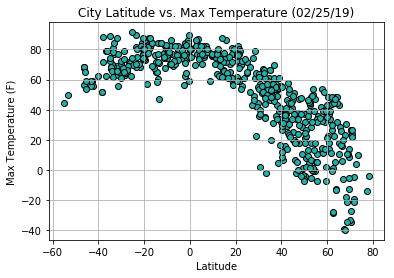

In [162]:
# Set x axis variable used in all plots
x_axis = cities_df["Lat"]

# Set y axis variable for temp
y_axis = cities_df["Max Temp"]

# Build scatter plot and add title, axis labels and gridlines
plt.scatter(x_axis, y_axis, c="lightseagreen", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (02/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save plot as .png
plt.savefig("Latitude_Temp.png")

plt.show()

#### Latitude vs. Humidity Plot

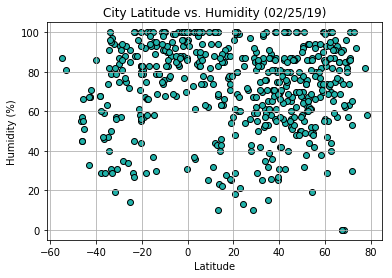

In [163]:
# Set y axis variable for humidity
y_axis = cities_df["Humidity"]

# Build scatter plot and add title, axis labels and gridlines
plt.scatter(x_axis, y_axis, c="lightseagreen", edgecolors="black")
plt.title("City Latitude vs. Humidity (02/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save plot as .png
plt.savefig("Latitude_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

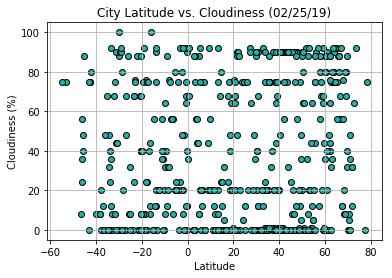

In [164]:
# Set y axis variable for cloudiness
y_axis = cities_df["Cloudiness"]

# Build scatter plot and add title, axis labels and gridlines
plt.scatter(x_axis, y_axis, c="lightseagreen", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (02/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save plot as .png
plt.savefig("Latitude_Clouds.png")

plt.show()

#### Latitude vs. Wind Speed Plot

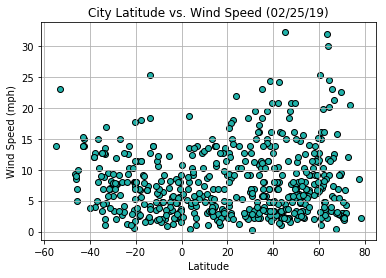

In [165]:
# Set y axis variable for wind speed
y_axis = cities_df["Wind Speed"]

# Build scatter plot and add title, axis labels and gridline
plt.scatter(x_axis, y_axis, c="lightseagreen", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (02/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save plot as .png
plt.savefig("Latitude_Wind.png")

plt.show()